<a href="https://colab.research.google.com/github/Esbern/Python-for-Planners/blob/main/Loading_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Data into Jupyter Notebooks

Jupyter Notebooks support multiple ways of loading data, depending on where the data is stored. This notebook will cover different methods, including:

- Loading local files
- Loading files from a GitHub repository
- Accessing simple APIs
- Querying APIs with parameters
- Connecting to a PostgreSQL database

Each method has its own use cases, which will be explained below.

---



## 1. Loading Local Files

Local files are files stored on your own computer. You can load them into Jupyter using `pandas.read_csv()` for CSV files, `pandas.read_excel()` for Excel files, and similar functions for other formats.



### When to use:

- When you have data stored locally on your own computer or in Google Drive (if using Google Colab).
- When working with Excel, CSV, or binary formats like HDF5.



### Example: Loading a CSV file from a local path



In [5]:

import pandas as pd

In [ ]:


# Load a CSV file from your local drive
df = pd.read_csv("titanic.csv")

# Display the first 5 rows
df.head()


### Example: Loading an Excel file



In [ ]:

df_excel = pd.read_excel("Afkrydsningsliste The Simulated City F25(2).xlsx", sheet_name="Ark1")
df_excel.head(20)



If using Google Colab, you can mount your Google Drive and access files stored there:



In [6]:

from google.colab import drive
drive.mount('/content/drive')

# Load file from Google Drive
df = pd.read_csv("/content/drive/My Drive/titanic.csv")
df.head()


Mounted at /content/drive


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500



---



## 2. Loading Files from a GitHub Repository

GitHub allows users to store and share datasets. If the dataset is in a text-based format like CSV or JSON, you can directly access the raw version using its URL.



### When to use:

- When working with public datasets hosted on GitHub.
- When you need to share and access data easily in collaborative projects.



### Example: Loading a CSV file from GitHub



In [11]:
df_github.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:

# URL of the raw CSV file from a GitHub repository
url = "https://raw.githubusercontent.com/Esbern/Python-for-Planners/refs/heads/main/data/titanic.csv"

# Load data into Pandas
df_github = pd.read_csv(url)

# Display first few rows
df_github.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<ipython-input-12-6ef8ba5a6978>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_github, x='Survived', y='Sex', inner='box', palette='Dark2')


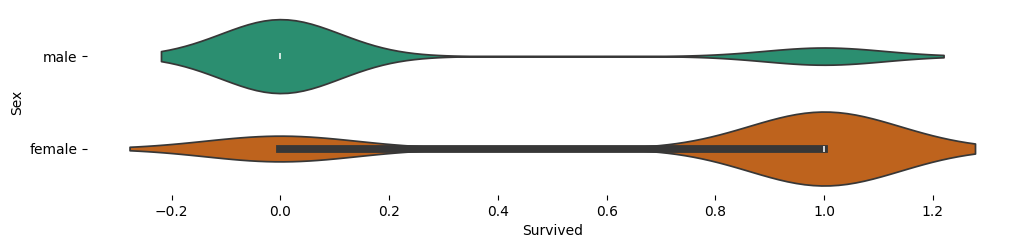

In [12]:
# @title Sex vs Survived

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_github['Sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_github, x='Survived', y='Sex', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)


---



## 3. Accessing Simple APIs

Many public datasets are available via APIs that return data in JSON format. These can be accessed using the `requests` library.



### When to use:

- When working with real-time or frequently updated datasets.
- When fetching structured data from web sources.



### Example: Accessing earthquake data from USGS



In [ ]:

import requests

# Define API endpoint
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/significant_month.geojson"

# Send GET request
response = requests.get(url)

# Convert response to JSON
data = response.json()

# View keys in the JSON response
data.keys()


In [ ]:
### See the notebook load_Earthquake_geojson_from_web.ipynb on github


---



# Api test
Prøv at se hvad der kommer ud af at hente data fra:

https://api.dataforsyningen.dk/kommuner

og hvad med

https://api.dataforsyningen.dk/datavask/adresser?betegnelse=universitetsvej,1

## 4. Querying APIs with Parameters

Some APIs require parameters in the request. These parameters can be sent using `requests.get()` (for GET requests) or `requests.post()` (for POST requests).



### When to use:

- When querying large datasets with filtering capabilities.
- When working with APIs that require authentication or complex queries.



### Example: Querying Statistics Denmark API



In [14]:

# Define API endpoint
url = "https://api.statbank.dk/v1/subjects"

# Define request parameters
payload = {
    "recursive": True,
    "omitSubjectsWithoutTables": True,
    "includeTables": False,
    "format": "JSON"
}

# Send API request
response = requests.post(url, json=payload)

# Convert response to JSON
data = response.json()

# Print first few subjects
data[:3]


[{'id': '1',
  'description': 'Borgere',
  'active': True,
  'hasSubjects': True,
  'subjects': [{'id': '3401',
    'description': 'Befolkning',
    'active': True,
    'hasSubjects': True,
    'subjects': [{'id': '20021',
      'description': 'Befolkningstal',
      'active': True,
      'hasSubjects': False,
      'subjects': []},
     {'id': '20024',
      'description': 'Indvandrere og efterkommere',
      'active': True,
      'hasSubjects': False,
      'subjects': []},
     {'id': '20022',
      'description': 'Befolkningsfremskrivning',
      'active': True,
      'hasSubjects': False,
      'subjects': []},
     {'id': '20019',
      'description': 'Adoptioner',
      'active': False,
      'hasSubjects': False,
      'subjects': []},
     {'id': '20017',
      'description': 'Fødsler',
      'active': True,
      'hasSubjects': False,
      'subjects': []},
     {'id': '20018',
      'description': 'Fertilitet',
      'active': True,
      'hasSubjects': False,
      'subject


---



## 5. Connecting to a PostgreSQL Database

Databases like PostgreSQL allow you to store and query large datasets efficiently. In Python, you can use the `psycopg2` library or `SQLAlchemy` to connect to a PostgreSQL database.



### When to use:

- When working with structured data stored in relational databases.
- When handling large datasets that exceed the memory capacity of a CSV or JSON file.



### Example: Connecting to a PostgreSQL Database and Querying a Table



In [ ]:

import psycopg2
import pandas as pd

# Database connection parameters
db_params = {
    "dbname": "GeoILUM",
    "user": "ws_gr1",
    "password": "GeoILUM",
    "host": "geoilum.ruc.dk",
    "port": 5432
}

# Connect to the database
conn = psycopg2.connect(**db_params)

# Query data from the public.base_attributes table
query = "SELECT * FROM geoilum.base_attributes LIMIT 5;"
df_db = pd.read_sql(query, conn)

# Close connection
conn.close()

# Display data
df_db.head()


5. Connecting to a PostgreSQL Database

Databases like PostgreSQL allow you to store and query large datasets efficiently. In Python, you can use the psycopg2 library or SQLAlchemy to connect to a PostgreSQL database.
When to use:

    When working with structured data stored in relational databases.
    When handling large datasets that exceed the memory capacity of a CSV or JSON file.

Example: Connecting to a PostgreSQL Database and Querying a Table



---



In [15]:

import psycopg2
import pandas as pd

# Database connection parameters
db_params = {
    "dbname": "GeoILUM",
    "user": "ws_gr1",
    "password": "GeoILUM",
    "host": "geoilum.ruc.dk",
    "port": 5432
}

# Connect to the database
conn = psycopg2.connect(**db_params)

# Query data from the public.base_attributes table
query = "SELECT * FROM geoilum.base_attributes LIMIT 5;"
df_db = pd.read_sql(query, conn)

# Close connection
conn.close()

# Display data
df_db.head()


<ipython-input-15-10147214fcb9>:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_db = pd.read_sql(query, conn)


,geotop_id,geotop_type,hældning,topografisk_positions_indeks,dybde_terrænnært_grundvand_vinter,cti_vådheds_indeks,dybde_terrænnært_grundvand_sommer,grovsand_i_jord_0_30cm_rucsoil2024,kalk_i_jord_0_30cm_rucsoil2024,ler_i_jord_0_30cm_rucsoil2024,...,afstand_til_natur_lysåben_basemap4,afstand_til_ferskvandelement_basemap4,drændybde_under_niveau_geus_særkørsel,afstand_til_beskyttede_drikkevandsboringer_bnbo,afstand_til_grundvandsdannende_opland_gdo,kulstof_i_jord_0_30cm_rucsoil2024,kvartærlerets_tykkelse,geo_div_100,geo_div_300,geo_div_500
0,377687,6,0.000019,-0.568595,0.000000,11.222332,0.000000,44.110001,0.490000,12.010000,...,20.000000,3373.133667,0.000000,18753.384766,16150.634811,2.095000,0.0,1,1,1
1,374447,10,2.213852,-0.036419,215.194444,7.504470,282.500000,29.672778,0.317222,11.451111,...,106.863735,97.132976,-0.917718,801.167279,16150.634811,1.654444,55.0,8,9,11
2,374448,11,1.551076,0.001102,145.157895,7.217237,194.105263,28.488948,0.341579,12.674210,...,14.440066,148.885182,-0.790967,537.528550,16150.634811,2.191053,54.0,6,10,10
3,374451,9,0.531498,0.527316,155.833333,5.905142,210.333333,23.200001,0.110000,17.506667,...,537.803731,436.194870,-0.768400,4769.709961,16150.634811,1.300000,59.0,2,3,3
4,374452,11,0.521237,0.413512,160.400000,7.995820,208.600000,23.209999,0.110000,17.393999,...,517.686884,453.564069,-0.765189,4789.855859,16150.634811,1.300000,59.0,2,3,3


## Summary of Data Loading Methods

|Method|Best for|Example|
|---|---|---|
|**Local Files**|Personal datasets, Excel, CSV, binary files|`pd.read_csv("file.csv")`|
|**GitHub Files**|Publicly shared CSV/JSON files|`pd.read_csv("https://raw.githubusercontent.com/...")`|
|**Simple APIs**|Fetching JSON data from web services|`requests.get(url).json()`|
|**APIs with Parameters**|Querying structured data with filters|`requests.post(url, json=payload).json()`|
|**Databases (PostgreSQL)**|Large datasets, structured data|`psycopg2.connect(...)`|

Each method has its use cases depending on the nature of the dataset and how frequently it changes.




# 📖 Understanding JSON and Python Dictionaries Using Norwegian Meteorological Service Data



## 🔎 **Introduction: Lists, Tuples, and Dictionaries in Python**

Before diving into JSON and APIs, let's first understand **dictionaries** and how they differ from **lists** and **tuples**—the two structures you’ve already learned.

|Data Structure|Syntax|Mutable?|Ordered?|Example|
|---|---|---|---|---|
|**List**|`[]`|✅ Yes|✅ Yes (since Python 3.7)|`["apple", "banana", "cherry"]`|
|**Tuple**|`()`|❌ No|✅ Yes|`("apple", "banana", "cherry")`|
|**Dictionary**|`{}`|✅ Yes|✅ Yes (since Python 3.7)|`{"name": "Alice", "age": 25}`|



### 🔹 **Lists**

- Ordered collection of items.
- Items are indexed starting from `0`.
- Can contain **duplicate values**.
- Example:
    
    ```python
    fruits = ["apple", "banana", "cherry"]
    print(fruits[1])  # Outputs: banana
    ```
    



### 🔹 **Tuples**

- Similar to lists but **immutable** (cannot be changed after creation).
- Example:
    
    ```python
    colors = ("red", "green", "blue")
    print(colors[0])  # Outputs: red
    ```
    



### 🔹 **Dictionaries**

- **Key-value pairs** (like a real-world dictionary: "word → definition").
- **Keys must be unique**.
- **Fast lookups** using keys instead of index numbers.
- Example:
    



In [ ]:

student = {"name": "Alice", "age": 25, "grade": "A"}
print(student["name"])  # Outputs: Alice


    

Dictionaries are **crucial** for working with JSON because JSON follows a **key-value** structure.

---


## 🔍 **Step 1: What is JSON?**

**JSON (JavaScript Object Notation)** is a text format that looks a lot like a Python dictionary.

Example JSON:



In [ ]:

{
  "temperature": 5.2,
  "wind_speed": 3.5,
  "weather": "Cloudy"
}



This JSON contains:

- `"temperature": 5.2`
- `"wind_speed": 3.5`
- `"weather": "Cloudy"`

When we fetch data from an API, it is usually returned in **JSON format**, and we can convert it into a **Python dictionary** to manipulate it.

---



## 🛠 **Step 2: Fetching Weather Data from the Norwegian Meteorological Service**

We can retrieve live weather data from the **Norwegian Meteorological Service API**. Let's first make a request and examine the JSON structure.



### 📥 **Fetching the JSON Data**



In [ ]:

import requests
import json

# API URL for Copenhagen (lat=55.6761, lon=12.5683)
url = "https://api.met.no/weatherapi/locationforecast/2.0/complete?lat=55.6761&lon=12.5683"

# Headers are required by the API
headers = {"User-Agent": "Python for Planners"}
response = requests.get(url, headers=headers)

# Convert JSON response to a Python dictionary
weather_data = response.json()

# Pretty print the JSON (for inspection)
print(json.dumps(weather_data, indent=2))



✅ **What happens here?**

- We **send a request** to the weather API.
- The response is returned in **JSON format**.
- We **convert it into a Python dictionary**.
- We print a **formatted JSON output** for easier reading.

---



## 🔍 **Step 3: Extracting Key Weather Information**

Since the data structure is a **nested dictionary**, we need to navigate through it.



In [ ]:

# Extract the first time series entry
first_entry = weather_data["properties"]["timeseries"][0]

# Extract timestamp
timestamp = first_entry["time"]

# Extract temperature and wind speed
temperature = first_entry["data"]["instant"]["details"]["air_temperature"]
wind_speed = first_entry["data"]["instant"]["details"]["wind_speed"]

print(f"Time: {timestamp}")
print(f"Temperature: {temperature}°C")
print(f"Wind Speed: {wind_speed} m/s")



---



## 📊 **Step 4: Visualizing Weather Data with Graphs**

Now that we have the weather data, let's **plot some fancy graphs**! We'll use **Matplotlib** and **Pandas** to visualize:

1. **Temperature over time**
2. **Wind speed over time**
3. **A combined plot of temperature and wind speed**



### 📦 **Installing Required Libraries**

If you haven't already installed Matplotlib and Pandas, install them using:



In [ ]:

pip install matplotlib pandas


### 🖥 **Code to Fetch Data and Create Graphs**



In [ ]:

import matplotlib.pyplot as plt
import pandas as pd

# Extract time series data
timeseries = weather_data["properties"]["timeseries"]

# Create lists for time, temperature, and wind speed
timestamps = []
temperatures = []
wind_speeds = []

for entry in timeseries[:48]:  # Take only 48 entries (next 2 days)
    timestamps.append(entry["time"])
    temperatures.append(entry["data"]["instant"]["details"]["air_temperature"])
    wind_speeds.append(entry["data"]["instant"]["details"]["wind_speed"])

# Convert lists into a Pandas DataFrame
df = pd.DataFrame({"Time": timestamps, "Temperature (°C)": temperatures, "Wind Speed (m/s)": wind_speeds})

# Convert Time column to datetime format for better plotting
df["Time"] = pd.to_datetime(df["Time"])

# Plot Temperature
plt.figure(figsize=(10, 5))
plt.plot(df["Time"], df["Temperature (°C)"], marker='o', linestyle='-', label="Temperature (°C)")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Forecast")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Plot Wind Speed
plt.figure(figsize=(10, 5))
plt.plot(df["Time"], df["Wind Speed (m/s)"], marker='s', linestyle='-', color='red', label="Wind Speed (m/s)")
plt.xlabel("Time")
plt.ylabel("Wind Speed (m/s)")
plt.title("Wind Speed Forecast")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Combined Plot
plt.figure(figsize=(10, 5))
plt.plot(df["Time"], df["Temperature (°C)"], marker='o', linestyle='-', label="Temperature (°C)")
plt.plot(df["Time"], df["Wind Speed (m/s)"], marker='s', linestyle='-', color='red', label="Wind Speed (m/s)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Temperature and Wind Speed Forecast")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()



---



## 🎨 **Understanding the Graphs**

1. **Temperature Forecast**:
    
    - Plots **temperature (°C) over time**.
    - Shows **hourly changes** for the next **48 hours**.
    - Uses **circles** (`o`) as markers.
2. **Wind Speed Forecast**:
    
    - Plots **wind speed (m/s) over time**.
    - Uses **squares** (`s`) as markers.
    - Helps in analyzing **wind conditions**.
3. **Combined Forecast**:
    
    - Displays both **temperature and wind speed** on the same graph.
    - Helps understand how **temperature and wind speed change together**.

---



## ✅ **Final Summary**

|Concept|Key Takeaways|
|---|---|
|**Lists**|Ordered, mutable, uses `[]`|
|**Tuples**|Ordered, immutable, uses `()`|
|**Dictionaries**|Key-value pairs, uses `{}`|
|**JSON**|Text format, similar to dictionaries|
|**API Calls**|Uses `requests` to fetch data|
|**Data Extraction**|JSON → Dictionary → Extract values|
|**Visualization**|Plots temperature and wind speed|

---



### 🏁 **Next Steps**

- **Modify the API URL** to get weather for different cities.
- **Extract and plot more weather details** (like precipitation).
- **Try using a bar chart** for wind speed.

🚀 **Now go ahead and create your own weather visualizations!** 🎨📊


# Creating an Interactive Map with Folium and GeoJSON



## Introduction

In this guide, you will learn how to use **Folium**, a Python library for interactive mapping, to visualize data from a GeoJSON file hosted on GitHub.

We will:

1. Load the GeoJSON data from GitHub.
2. Create a **Folium** map centered around the locations in the dataset.
3. Add the GeoJSON data to the map.
4. Display the final interactive map.

---



## Step 1: Install Folium

Before we begin, ensure you have **Folium** installed. You can install it using:



In [ ]:

pip install folium



---



## Step 2: Load the GeoJSON Data

We will fetch the **GeoJSON** data directly from GitHub. The URL for the file is:

📌 **GeoJSON URL:**  
[`https://raw.githubusercontent.com/Esbern/Python-for-Planners/refs/heads/main/test.geojson`](https://raw.githubusercontent.com/Esbern/Python-for-Planners/refs/heads/main/test.geojson)

In Python, use the `requests` library to download the GeoJSON file:



In [ ]:

import requests
import folium

# URL of the GeoJSON file
geojson_url = "https://raw.githubusercontent.com/Esbern/Python-for-Planners/refs/heads/main/test.geojson"

# Fetch the data
response = requests.get(geojson_url)
geojson_data = response.json()



---



## Step 3: Create the Map

Now, we will create a **Folium** map centered around the locations in our **GeoJSON** data.

We extract the first location’s coordinates and use them to set the initial map view.



In [ ]:

# Extract the first coordinate for map centering
first_feature = geojson_data["features"][0]
center_coords = first_feature["geometry"]["coordinates"][::-1]  # Reverse to (lat, lon)

# Create the map centered around the first location
m = folium.Map(location=center_coords, zoom_start=14)



---



## Step 4: Add GeoJSON Data to the Map

Now, we will **add the GeoJSON layer** to the map.



In [ ]:

# Add GeoJSON data to the map
folium.GeoJson(
    geojson_data,
    name="GeoJSON Layer",
    tooltip=folium.GeoJsonTooltip(fields=["NAvn"])  # Show 'NAvn' property on hover
).add_to(m)



---



## Step 5: Display the Map

Finally, display the interactive map.



In [ ]:

# Show the map
m



💡 **In Jupyter Notebook**, the map will automatically render when you run the cell. If you're using a script, save it as an **HTML file**:



In [ ]:

m.save("map.html")



---



## Full Code

Here’s the **complete script**:



In [ ]:

import requests
import folium

# Step 1: Load the GeoJSON data
geojson_url = "https://raw.githubusercontent.com/Esbern/Python-for-Planners/refs/heads/main/test.geojson"
response = requests.get(geojson_url)
geojson_data = response.json()

# Step 2: Get map center from first feature
first_feature = geojson_data["features"][0]
center_coords = first_feature["geometry"]["coordinates"][::-1]  # Reverse to (lat, lon)

# Step 3: Create Folium map
m = folium.Map(location=center_coords, zoom_start=14)

# Step 4: Add GeoJSON layer
folium.GeoJson(
    geojson_data,
    name="GeoJSON Layer",
    tooltip=folium.GeoJsonTooltip(fields=["NAvn"])
).add_to(m)

# Step 5: Save and show the map
m.save("map.html")
m  # Display in Jupyter Notebook


# Kan du ved at kombinere Adresse vask data og geojson kortet ovenfor lave et kort med en prik der hvor du bor.

In [ ]:
#@title Solution
import requests
import folium

# API endpoint for address lookup
lookup_url = "https://api.dataforsyningen.dk/datavask/adresser?betegnelse=universitetsvej,1"
lookup_response = requests.get(lookup_url)
lookup_data = lookup_response.json()

# Extract first address from results
first_result = lookup_data.get("resultater", [])[0]
address_id = first_result.get("adresse", {}).get("id", "")

if address_id:
    # Construct address details URL
    address_url = f"https://api.dataforsyningen.dk/adresser/{address_id}"
    address_response = requests.get(address_url)
    address_data = address_response.json()

    # Extract coordinates
    coords = address_data.get("adgangsadresse", {}).get("adgangspunkt", {}).get("koordinater", [])

    if coords:
        lat, lon = coords[1], coords[0]  # Reverse order since Folium expects (lat, lon)

        # Create a Folium map centered at the coordinates
        m = folium.Map(location=[lat, lon], zoom_start=16)

        # Add a marker
        folium.Marker(
            location=[lat, lon],
            popup=address_data.get("adressebetegnelse", "Address"),
            tooltip="Click for info"
        ).add_to(m)

        # Save and display the map
        m.save("map.html")
        print("Map saved as map.html")
    else:
        print("Coordinates not found in API response.")
else:
    print("No valid address found in lookup response.")
m

Map saved as map.html



---



## Summary

✔ **Loaded** GeoJSON data from a **GitHub URL**  
✔ **Created** a Folium map centered on the locations  
✔ **Added** the GeoJSON data with tooltips  
✔ **Displayed** the interactive map

Now, open **`map.html`** in a browser to explore your map! 🚀
